In [ ]:
!pip install grad-cam

# **Importing Library**

In [1]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import cv2
import torch
import torch.nn.functional as F
import numpy as np


**Note : both codes are taken from this repository https://github.com/jacobgil/pytorch-grad-cam**

# CNN Attention Map Visualization

In [3]:
# 
def Attention_visualization(model,img_path,class_index):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),          
    
    # Load and transform the image
    image_path = img_path
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0)
    
    
    resized_image = image.resize((224, 224))
    rgb_img = np.array(resized_image).astype(np.float32) / 255.0
    
    # Construct the CAM object
    cam = GradCAM(model=model, target_layers=target_layers)
    
    
    targets = [ClassifierOutputTarget(class_index)]
    
    # Generate the CAM
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    
    # Extract the CAM 
    grayscale_cam = grayscale_cam[0, :]
    
    heatmap = cv2.applyColorMap(np.uint8(255 * grayscale_cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    visualization = heatmap + rgb_img
    visualization = visualization / np.max(visualization)
    
    # Display the visualization
    plt.imshow(visualization)
    plt.show()
    
    # model outputs 
    model_outputs = cam.outputs
  
    model_outputs = cam.outputs
    logits = model_outputs
# Apply softmax to get probabilities
    probabilities = F.softmax(logits, dim=1).detach().numpy()

# Find the class with the highest probability
    predicted_class = np.argmax(probabilities)
    
    print("Probabilities:", probabilities)
    print("Predicted Class:", predicted_class)

In [4]:
class ResNet(torch.nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.resnet = torchvision.models.resnet101(pretrained=True)
        
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.resnet(x)

model = ResNet(num_classes=3)
model.load_state_dict((torch.load("/home/ahmed/PycharmProjects/Covid/BEST_MODELS_BRAIN/my_folder/Resnet101/best_model.pth")))
target_layers = [model.resnet.layer4[-1]]

/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ahmed/PycharmProjects/Covid/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_14089/1637775666.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorc

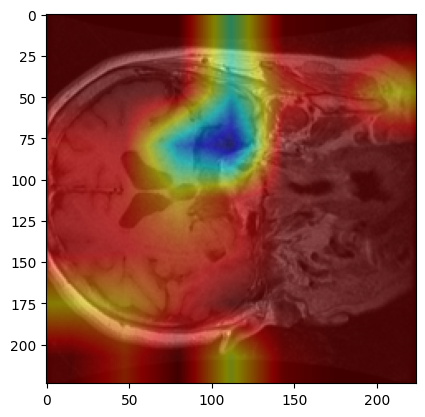

Probabilities: [[0.40692642 0.02913182 0.5639417 ]]
Predicted Class: 2


In [8]:
Attention_visualization(model=model,img_path="/home/ahmed/PycharmProjects/Covid/Organized/Final_dataset/images/Test/3/494948534956_1099_image.png",class_index=2)

# **ViT Visualization**

In [49]:
!python ViT Visualization.py --image-path "/home/ahmed/PycharmProjects/Covid/BEST_MODELS_IN_LUNG/Lung/A/1-002_58.png" --method gradcam

Using CPU for computation
/home/ahmed/PycharmProjects/Covid/new_cam.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/home/ahmed/PycharmProjects